# Assignment

Use the "from the expert" (FTE) jupyter notebook as a starter for this assignment, and ask your instructor questions if you need help.

Use the `churn_data.csv` file to carry out a similar EDA and visualization process as what we did in the FTE. Create at least 2 EDA plots, and create a HTML file with an auto-EDA analysis using pandas-profiling or another auto-EDA Python package. Write a short analysis at the end of the assignment in markdown. 

## Data science process steps this week
We will carry out the first two parts of the CRISP-DM data science process this week:

1. Business understanding

This is customer churn data for a telecommunications company. Customers can have phone as well as other services. The company is looking to reduce customer churn, where customers stop using the company's services and cancel their account. The 'Churn' column has a binary target, yes or no, that denotes if a customer churned. We want to create a machine learning model to predict the Churn target using the other available data in the dataset. Ideally, we will deploy this model to integrate with the company's database, so that a churn risk column is created for each customer. This will enable customer service reps and others to devise and use strategies to reduce churn.


2. Data understanding

Carry out some EDA as we did in the FTE, such as using pandas-profiling. Create a histogram like we did in the FTE, where we plot a numeric column with the target as the 'hue'. Optional challenge: create other plots with the target as the hue, such as bar plots for the categorical columns.

In [1]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


# Package installation above. Start here

# Basic Data Understanding

## Step 1: Importing ProfileReport

In [2]:
# importing ProfileReport
from ydata_profiling import ProfileReport

## Step 2: Import CSV file to Dataframe

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/johnxie301/Desktop/Data Science 600/Assignment 1/churn_data.csv')
df.head(5)

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes


## Step 3: Create Churn data report file in HTML file format

In [ ]:
profile = ProfileReport(df, title = 'Churn_data')
profile.to_file('churn_data1.html')

In [3]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [4]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [5]:
df.value_counts(['Contract','PaymentMethod'])

Contract        PaymentMethod            
Month-to-month  Electronic check             1850
                Mailed check                  893
                Bank transfer (automatic)     589
Two year        Credit card (automatic)       581
                Bank transfer (automatic)     564
Month-to-month  Credit card (automatic)       543
One year        Credit card (automatic)       398
                Bank transfer (automatic)     391
Two year        Mailed check                  382
One year        Electronic check              347
                Mailed check                  337
Two year        Electronic check              168
Name: count, dtype: int64

We can see that the most popular form of contract and Payment method people like to choose is 'Month to month' and 'Electronic check'


# Data Understanding Graphs

## Bar charts of values counts of Contract and Payment Method

<Axes: xlabel='Contract,PaymentMethod'>

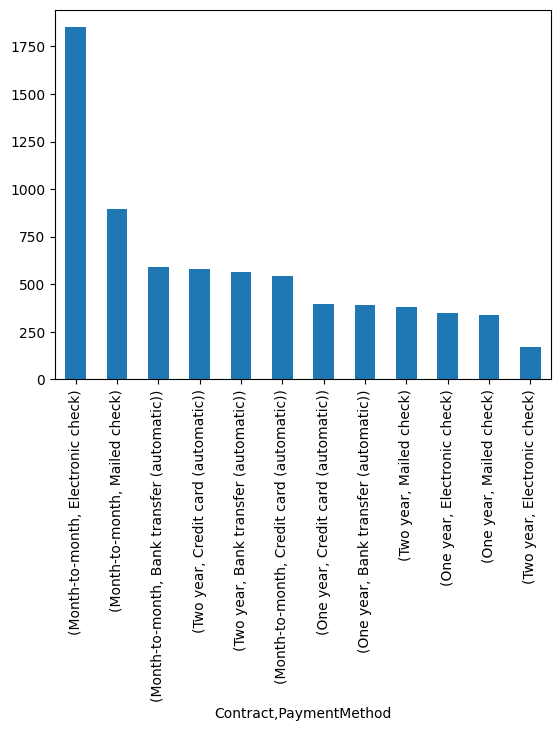

In [6]:
df.value_counts(['Contract','PaymentMethod']).plot.bar()

In [7]:
import phik
import seaborn as sns



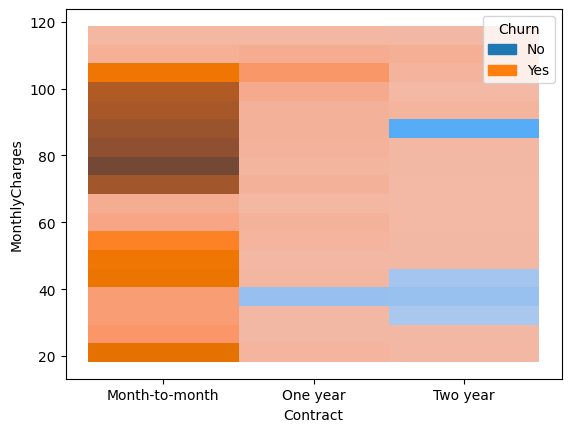

In [8]:
a  = sns.histplot(data=df,y="MonthlyCharges", x="Contract",hue= "Churn",common_norm= False)

### Note: Did not find any trends in different payments and monthly charges having effects on Churn rate.

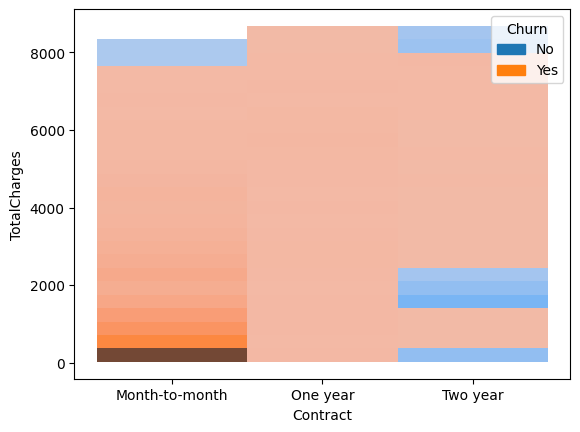

In [9]:
a  = sns.histplot(data=df,y="TotalCharges", x="Contract",hue= "Churn",common_norm= False)

### Note: For people pay month to month( the most popular payment method), there seems a correlation between total charges and churn rate.

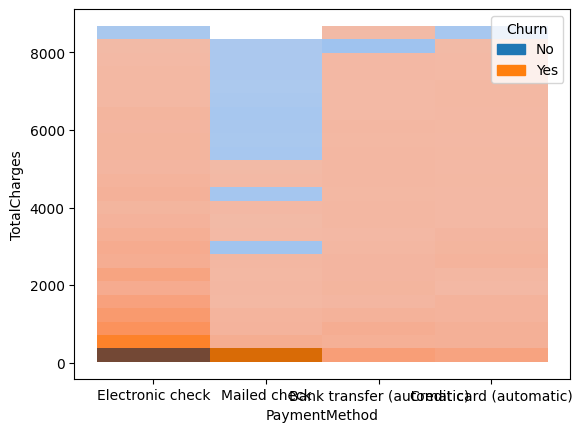

In [10]:
a  = sns.histplot(data=df,y="TotalCharges", x="PaymentMethod",hue= "Churn",common_norm= False)

### Note: For people that use Eletronic check to pay, there seems a correlation between total charges and churn rate.

<Axes: >

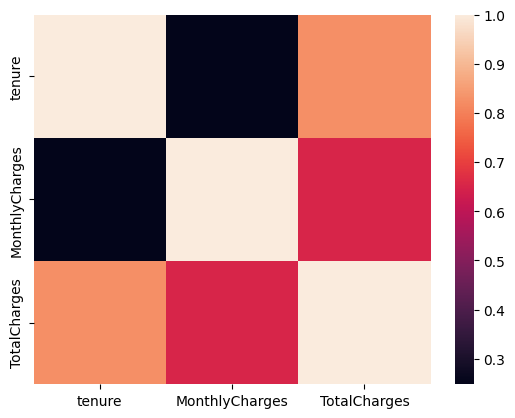

In [11]:
sns.heatmap(data = df.corr(numeric_only = True))


### Note: Churn rate is more related to monthly charges. Not churn is more related to tenure and total charges

# Analysis:
Based on the histgrams we created on top, customers with month-to-month payments and electronic payments are more likely to churn. Customers with longer tenure and total charges are less likely to churn. One way we can do is to give more incentives for one year or two year contract.

We can also see that the more total payments, the less risk of churn. One suggested solution is give out great deals when people reach a certain total charges like how the mobile games do. E.g. 5% down every $1,000 total charges they use. Or give a $20 off on every $1000 spent. 




# Data Preparation

## Filtering Data

Thoughts: Since Churn rate is corrleated to monthly_seperations, let's find out for the people that churned, where are they monthly charges land into?(If more people churned due to high monthly charges, we can try to offer a discount or using a over $50 get $5 off discounts kind of strategy to keep the customers interested)

In [12]:
import numpy as np
bins = np.linspace(min(df['MonthlyCharges']), max(df['MonthlyCharges']), 4)
bins
Monthly_price_level = ['low','medium','high']
df['monthly_seperation'] = pd.cut(df['MonthlyCharges'], bins, labels = Monthly_price_level, include_lowest = True)
df.head()

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,monthly_seperation
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No,low
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No,medium
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes,medium
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No,low
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes,medium


In [13]:
df_test1 = df[df['Churn'] == 'Yes']
churn_monthly = df_test1.value_counts(['monthly_seperation'])
churn_monthly

monthly_seperation
medium                742
high                  724
low                   403
Name: count, dtype: int64

In [14]:
df_test2 = df[df['Churn'] == 'No']
nochurn_monthly = df_test2.value_counts(['monthly_seperation'])
nochurn_monthly

monthly_seperation
low                   2048
medium                1697
high                  1429
Name: count, dtype: int64

In [15]:
ratio = churn_monthly / df.value_counts(['monthly_seperation'])
ratio

monthly_seperation
low                   0.164423
medium                0.304223
high                  0.336275
Name: count, dtype: float64

Note: \
In a equally distributed monthly charge level: \
For low monthly charges, people are less likely to churn; For medium and high monthly charges, people are more likely to churn.

## Checking Outliers

<Axes: >

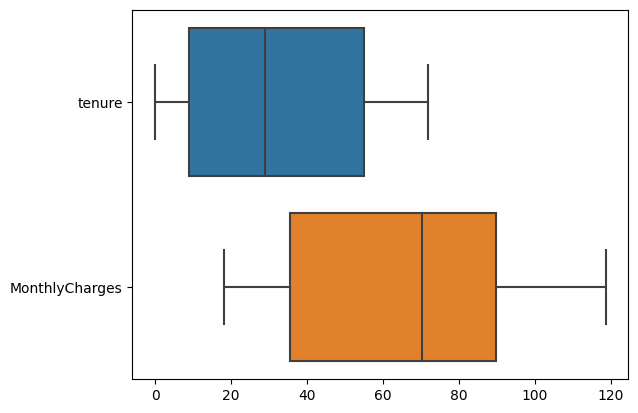

In [20]:
sns.boxplot(data= df[['tenure','MonthlyCharges']], orient= 'h')
#Professor Pearson provided this code in week_2-From_the_expert_Data_preparation

<Axes: >

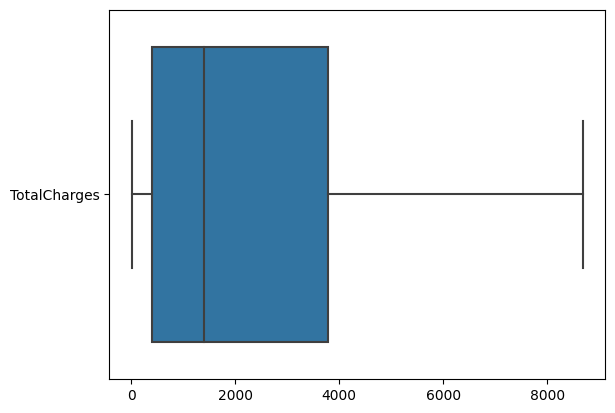

In [22]:
# Due to visibility, I separated total charges from the other two
sns.boxplot(data= df[['TotalCharges']], orient= 'h')

### Note: There is no outliers for all numerical columns

## Missing Values

In [32]:
#This code is provided by Christy from Week_2-From_the_expert_Data_preparation
df.isna().sum()

customerID             0
tenure                 0
PhoneService           0
Contract               0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
Churn                  0
monthly_seperation     0
dtype: int64

Note: TotalCharges has 11 missing data, we need to pull out and see if there is anything we can do with it.

In [24]:
df.head()

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,monthly_seperation
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No,low
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No,medium
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes,medium
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No,low
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes,medium


Note: By taking a look at the data I found that total charges are similar to MonthlyCharges * tenure and the total price may differ when the contract and payment method is different

In [34]:
df['TotalCharges'].dtypes

dtype('float64')

In [40]:
df1 = df[df['TotalCharges'].isnull() == True]
df1

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,monthly_seperation
488,4472-LVYGI,0,No,Two year,Bank transfer (automatic),52.55,NaN,No,medium
753,3115-CZMZD,0,Yes,Two year,Mailed check,20.25,NaN,No,low
936,5709-LVOEQ,0,Yes,Two year,Mailed check,80.85,NaN,No,medium
1082,4367-NUYAO,0,Yes,Two year,Mailed check,25.75,NaN,No,low
1340,1371-DWPAZ,0,No,Two year,Credit card (automatic),56.05,NaN,No,medium
3331,7644-OMVMY,0,Yes,Two year,Mailed check,19.85,NaN,No,low
3826,3213-VVOLG,0,Yes,Two year,Mailed check,25.35,NaN,No,low
4380,2520-SGTTA,0,Yes,Two year,Mailed check,20.00,NaN,No,low
5218,2923-ARZLG,0,Yes,One year,Mailed check,19.70,NaN,No,low
6670,4075-WKNIU,0,Yes,Two year,Mailed check,73.35,NaN,No,medium


Note: When we pull out all the data we see that TotalCharges are not given becase tenure is 0. I would assume their total charges should equal to monthly charges.

In [45]:
#This does not work :(, I tried
#df['TotalCharges'].replace(np.nan, df['MonthlyCharges'])

Note: I could not find a good way to replace, I should ask about a easier way next clase. But I just thought of a good idea. I will delete all nan roles. And in the new dataframe I created, i can make Totalcharges = monthly charges. Then I can union this two column to make it complete again.

In [46]:
df1['TotalCharges'] = df1['MonthlyCharges']
df1

/var/folders/cq/h9b2vxfd42sc_hkml7gp1d2m0000gn/T/ipykernel_6882/2861314371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges'] = df1['MonthlyCharges']


,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,monthly_seperation
488,4472-LVYGI,0,No,Two year,Bank transfer (automatic),52.55,52.55,No,medium
753,3115-CZMZD,0,Yes,Two year,Mailed check,20.25,20.25,No,low
936,5709-LVOEQ,0,Yes,Two year,Mailed check,80.85,80.85,No,medium
1082,4367-NUYAO,0,Yes,Two year,Mailed check,25.75,25.75,No,low
1340,1371-DWPAZ,0,No,Two year,Credit card (automatic),56.05,56.05,No,medium
3331,7644-OMVMY,0,Yes,Two year,Mailed check,19.85,19.85,No,low
3826,3213-VVOLG,0,Yes,Two year,Mailed check,25.35,25.35,No,low
4380,2520-SGTTA,0,Yes,Two year,Mailed check,20.00,20.00,No,low
5218,2923-ARZLG,0,Yes,One year,Mailed check,19.70,19.70,No,low
6670,4075-WKNIU,0,Yes,Two year,Mailed check,73.35,73.35,No,medium


In [50]:
df.dropna(subset=['TotalCharges'],axis=0,inplace=True)

In [51]:
df

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,monthly_seperation
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No,low
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No,medium
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes,medium
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No,low
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes,medium
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No,medium
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No,high
7040,4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No,low
7041,8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes,medium


In [52]:
df = pd.concat([df,df1],axis=0)
df

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,monthly_seperation
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No,low
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No,medium
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes,medium
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No,low
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes,medium
...,...,...,...,...,...,...,...,...,...
3826,3213-VVOLG,0,Yes,Two year,Mailed check,25.35,25.35,No,low
4380,2520-SGTTA,0,Yes,Two year,Mailed check,20.00,20.00,No,low
5218,2923-ARZLG,0,Yes,One year,Mailed check,19.70,19.70,No,low
6670,4075-WKNIU,0,Yes,Two year,Mailed check,73.35,73.35,No,medium


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 6754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customerID          7043 non-null   object  
 1   tenure              7043 non-null   int64   
 2   PhoneService        7043 non-null   object  
 3   Contract            7043 non-null   object  
 4   PaymentMethod       7043 non-null   object  
 5   MonthlyCharges      7043 non-null   float64 
 6   TotalCharges        7043 non-null   float64 
 7   Churn               7043 non-null   object  
 8   monthly_seperation  7043 non-null   category
dtypes: category(1), float64(2), int64(1), object(5)
memory usage: 502.2+ KB


Note: all data looks good now!

## Convert Categorical data to numeric data

In [55]:
#phone service column
df['PhoneService'] = df['PhoneService'].replace({'Yes':1,'No':0})


In [56]:
#Contract column
df['Contract'] = df['Contract'].replace({'Month-to-month':0,'One year':1,'Two year':2})


In [67]:
#PaymentMethod
df['PaymentMethod']= df['PaymentMethod'].replace({'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)':3})


In [60]:
#Churn
df['Churn'] = df['Churn'].replace({'Yes':1,'No':0})

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 6754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customerID          7043 non-null   object  
 1   tenure              7043 non-null   int64   
 2   PhoneService        7043 non-null   int64   
 3   Contract            7043 non-null   int64   
 4   PaymentMethod       7043 non-null   int64   
 5   MonthlyCharges      7043 non-null   float64 
 6   TotalCharges        7043 non-null   float64 
 7   Churn               7043 non-null   int64   
 8   monthly_seperation  7043 non-null   category
dtypes: category(1), float64(2), int64(5), object(1)
memory usage: 502.2+ KB


All clear!

In [70]:
df.to_csv('Assignment 1/churn_data_cleaned.csv')